In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
df_test=pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [3]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [5]:
df_train.shape

(90615, 10)

In [6]:
df_test.shape

(60411, 9)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


In [9]:
df_test.duplicated().sum()

0

In [10]:
df_test.duplicated().sum()

0

In [11]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
df_test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

In [13]:
df_train.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
df_test.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
count,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000
mean,120820.000000,0.517428,0.401961,0.135751,0.790062,0.341227,0.169419,0.226125
std,17439.297893,0.117609,0.097470,0.038175,0.457591,0.204221,0.100720,0.129826
min,90615.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,105717.500000,0.450000,0.345000,0.110000,0.419500,0.178500,0.086500,0.120000
50%,120820.000000,0.545000,0.425000,0.140000,0.801500,0.329000,0.166000,0.225000
75%,135922.500000,0.600000,0.470000,0.160000,1.070000,0.464500,0.232500,0.305000
max,151025.000000,0.800000,0.650000,1.095000,2.825500,1.488000,0.641500,1.004000


### Encode categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_test['Sex'] = le.transform(df_test['Sex'])

In [19]:
df_train['Sex'].value_counts()

Sex
1    33093
2    31027
0    26495
Name: count, dtype: int64

In [20]:
df_test['Sex'].value_counts()

Sex
1    22241
2    20783
0    17387
Name: count, dtype: int64

<Axes: xlabel='Rings', ylabel='count'>

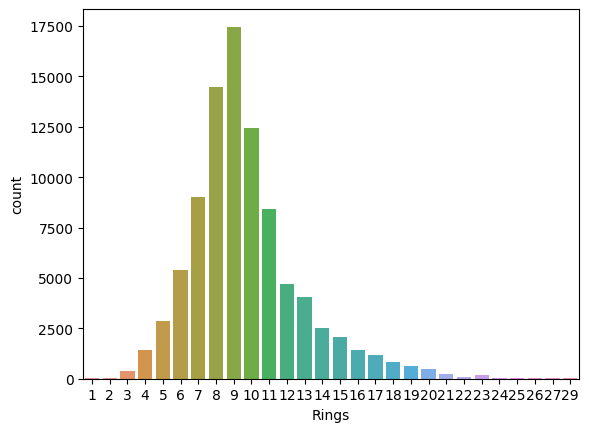

In [21]:
# Visualize the distribution of the target variable (Rings)
sns.countplot(x='Rings',data=df_train)

<Axes: xlabel='Sex', ylabel='count'>

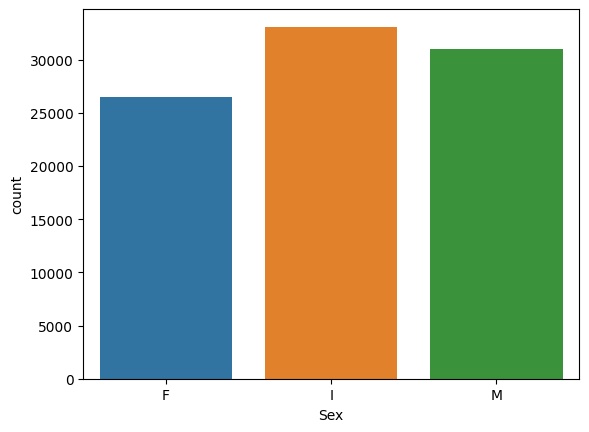

In [35]:
sns.countplot(x='Sex',data=df_train)

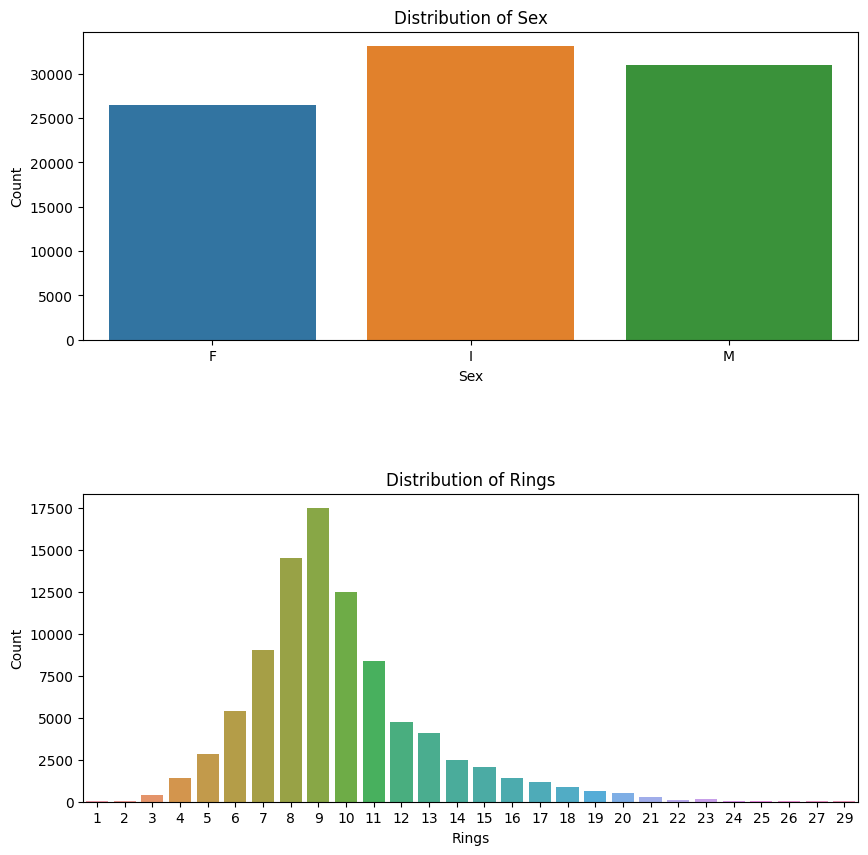

In [9]:

# List of categorical columns
categorical_columns = ['Sex', 'Rings']  

# Set up the plotting grid
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))
plt.subplots_adjust(hspace=0.5)  # Adjust space between plots

# Plot count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df_train, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.show()

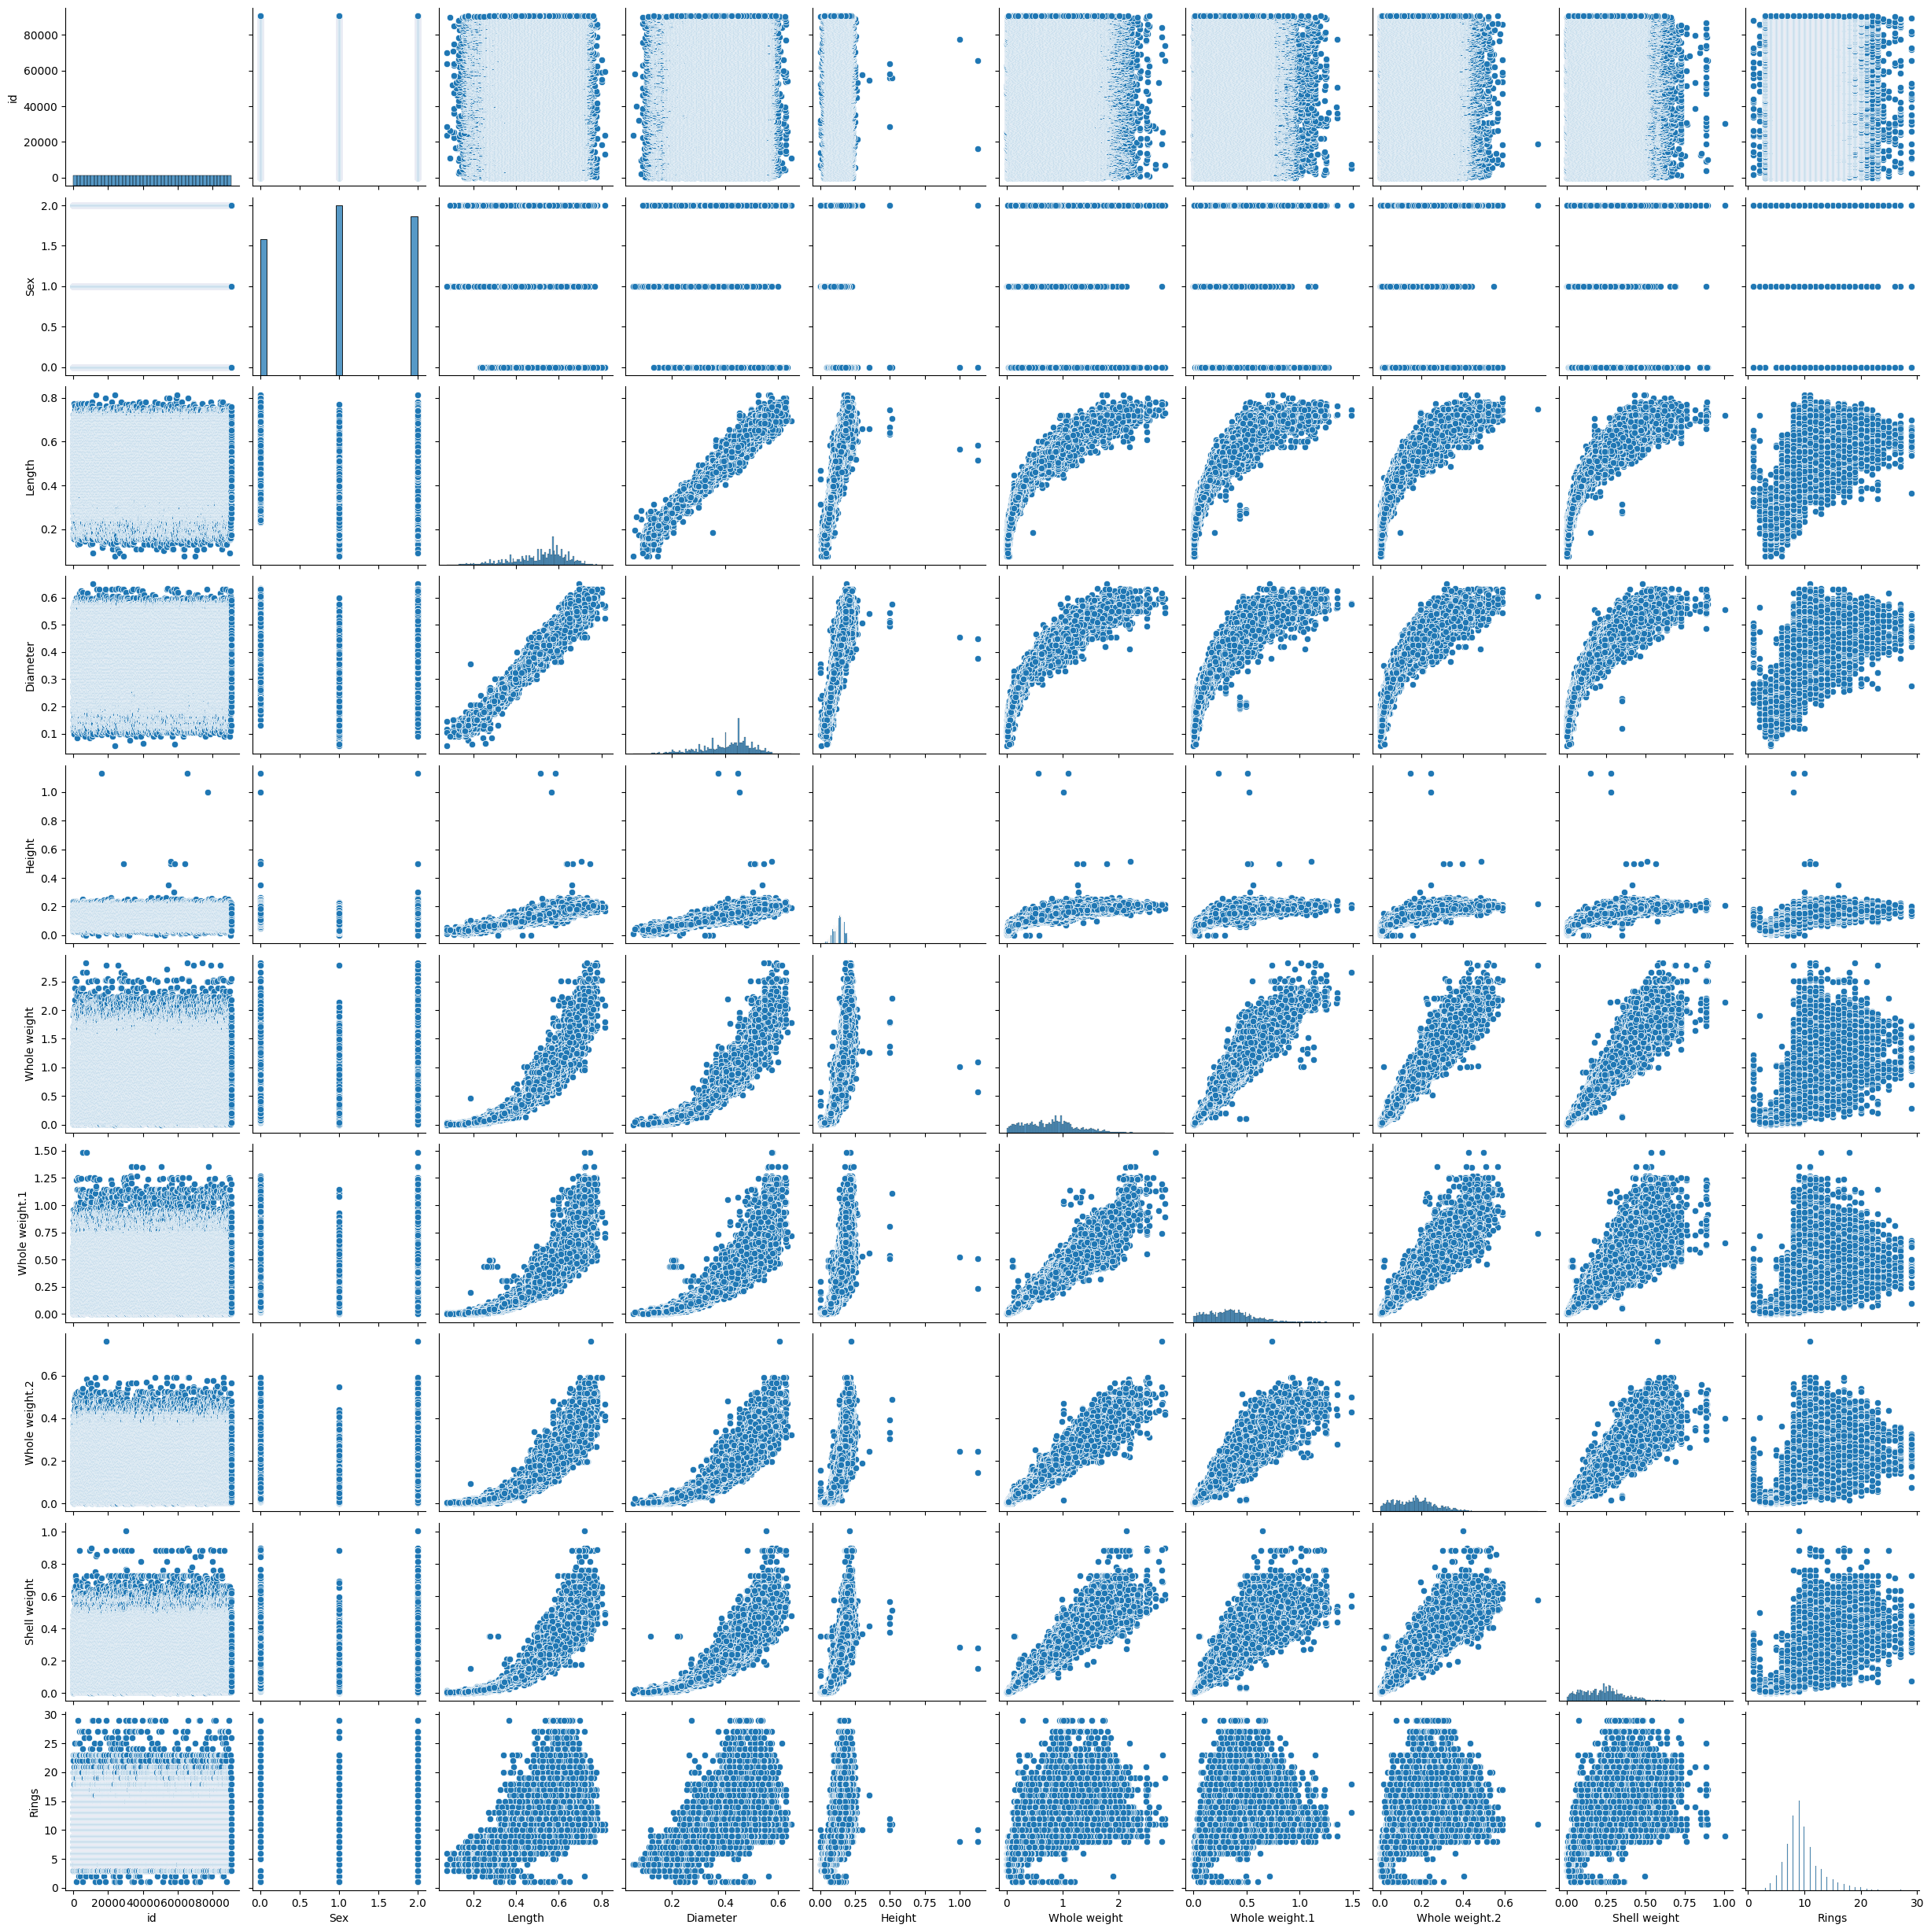

In [24]:
pair_plot = sns.pairplot(df_train)
pair_plot.savefig("pair_plot.png", dpi=300)  
plt.show()

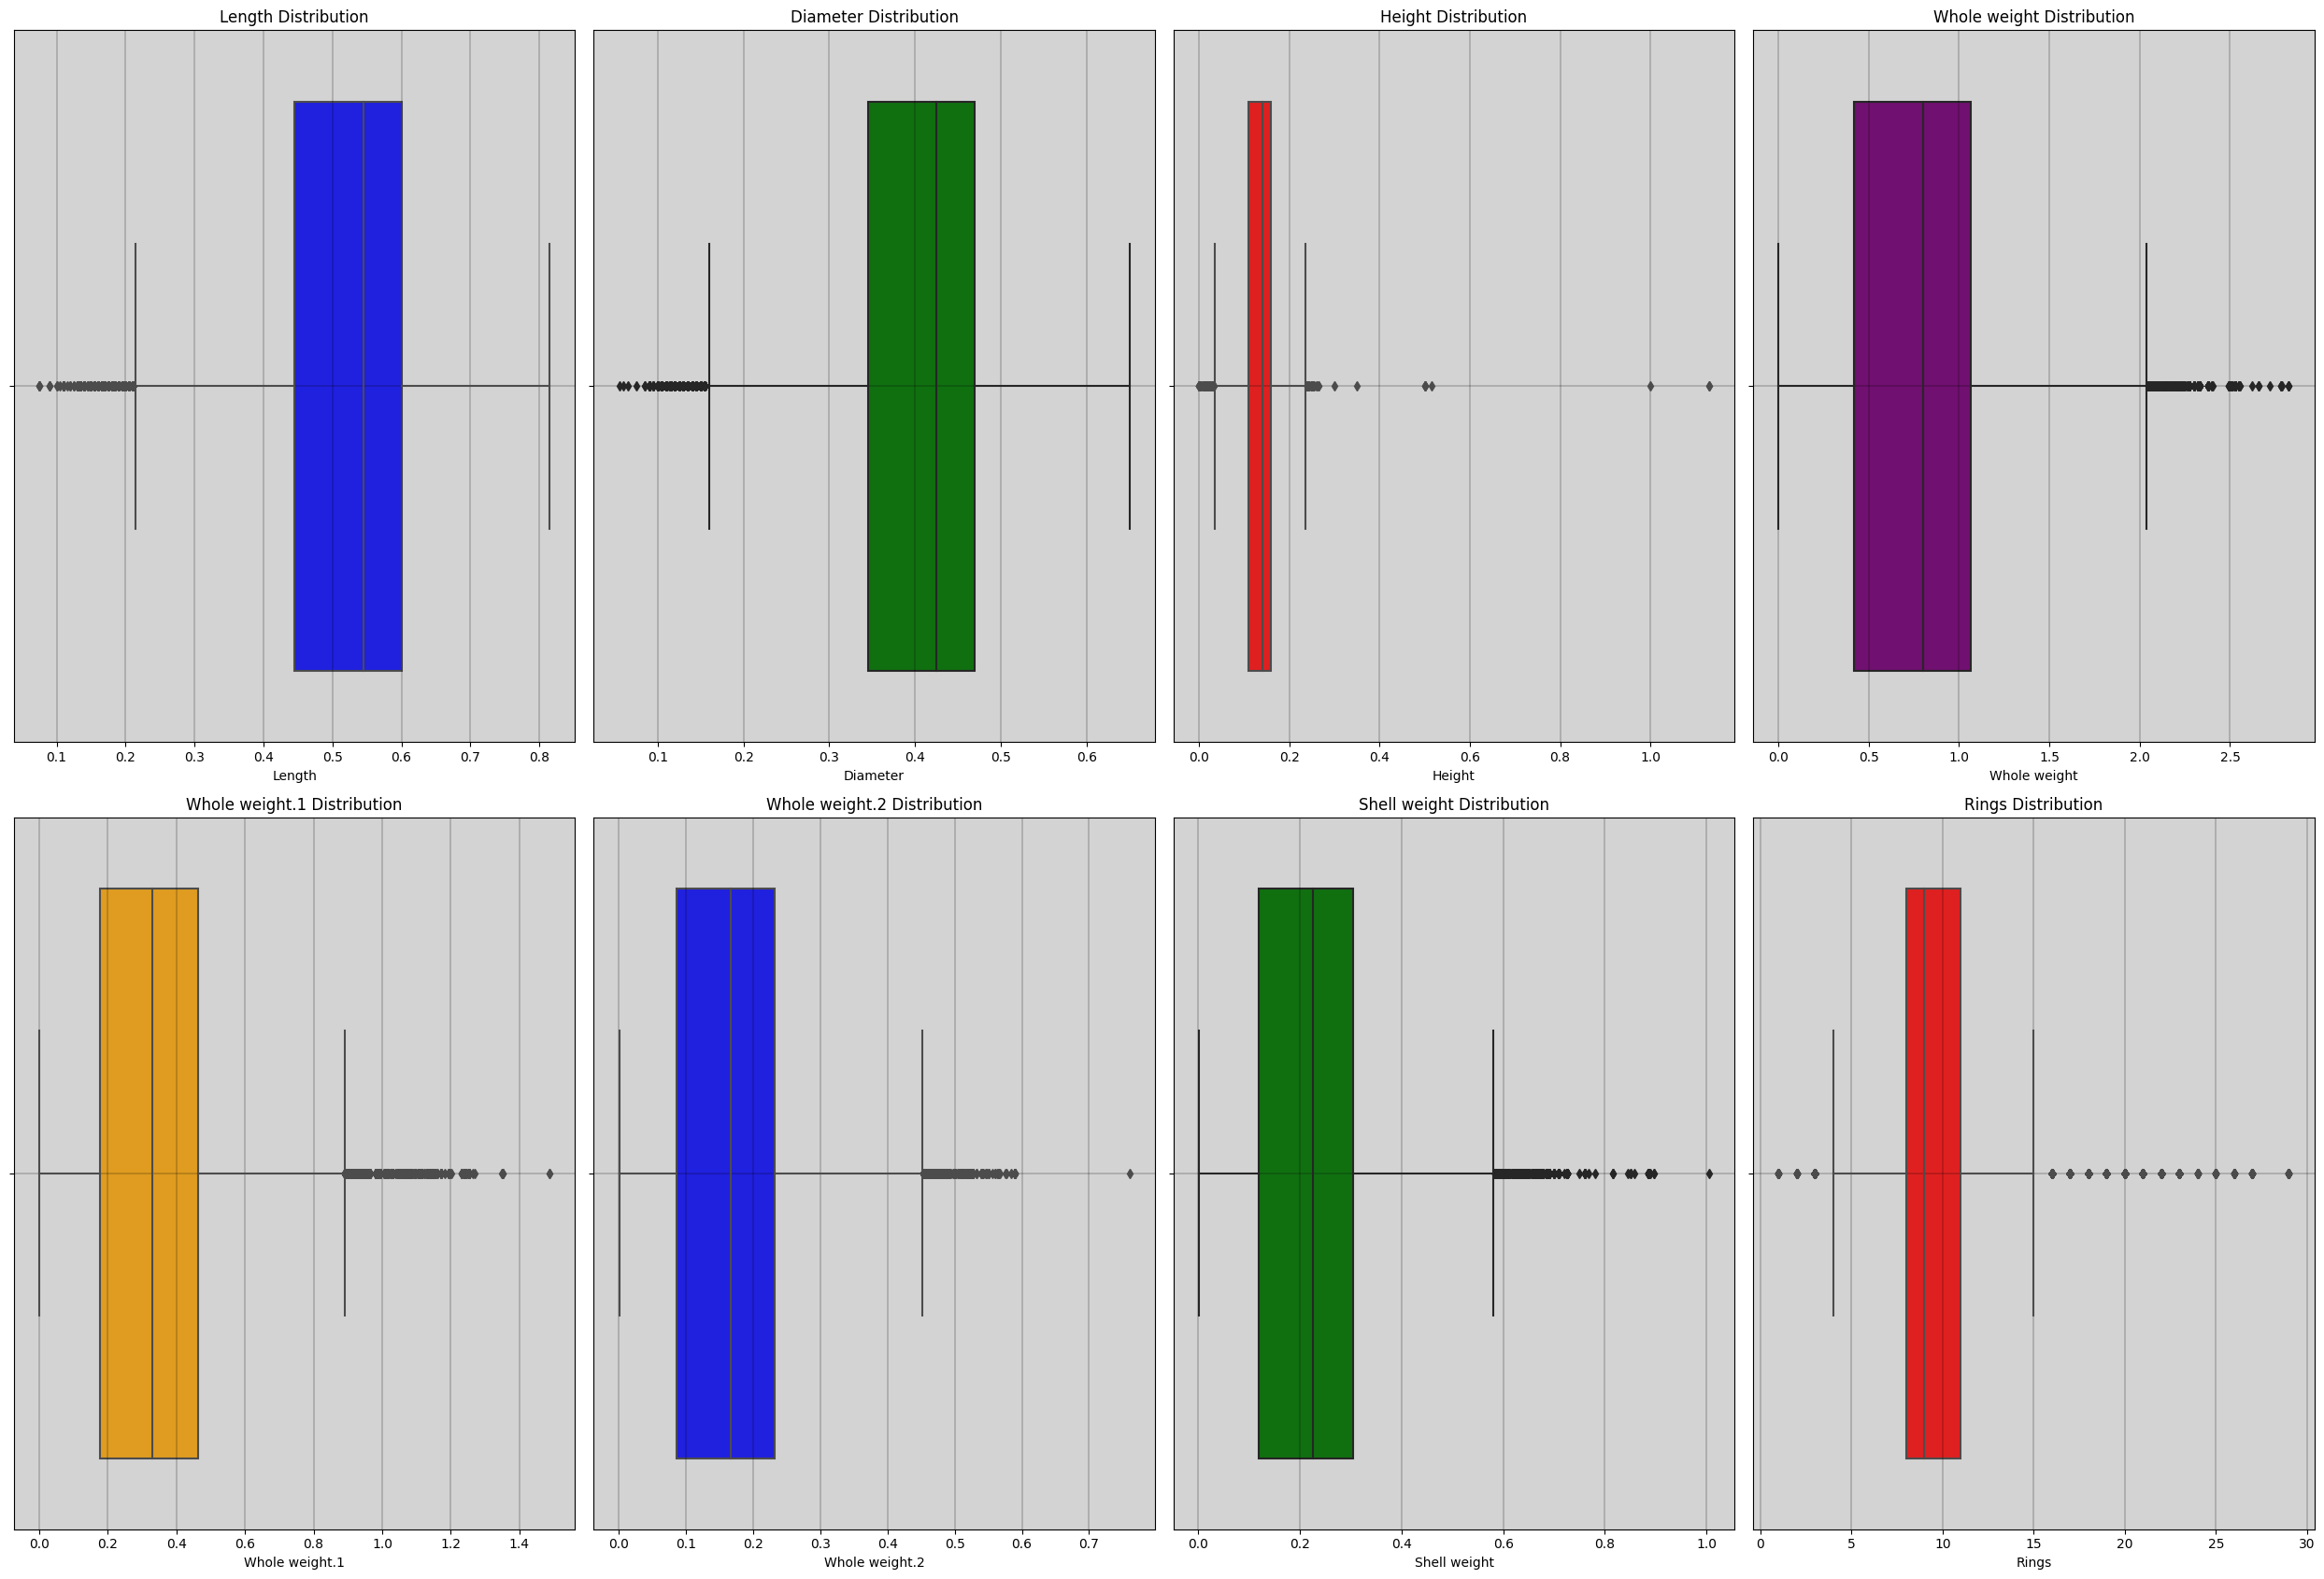

In [25]:


def MultiBoxplot(df, num_cols, f_cols=4, filename=None):
    f_rows = np.ceil(len(num_cols) / f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    
    color = ['blue', 'green', 'red', 'purple', 'orange']  # Define some colors for the plots
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i], color=color[i % len(color)])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
    
    # Remove any empty subplots
    if len(num_cols) % f_cols != 0:
        for i in range(f_cols - len(num_cols) % f_cols):
            fig.delaxes(axes[-i-1])

    plt.tight_layout()

    # Save the plot if filename is provided
    if filename:
        plt.savefig(filename, dpi=300)  # Save as PNG file with 300 dpi resolution

    plt.show()

# List of columns you want to plot
selected_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']

# Call the function with the selected columns
MultiBoxplot(df=df_train, num_cols=selected_columns, filename="box_plots.png")


In [26]:
def remove_outliers(df):
    numeric_cols = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']]

    # Calculate the first and third quartiles
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Filter the data to remove rows with outliers
    df_filtered = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_filtered

# Apply the function to the training data
df_train = remove_outliers(df_train)


In [27]:
corr_matrix = df_train.corr()

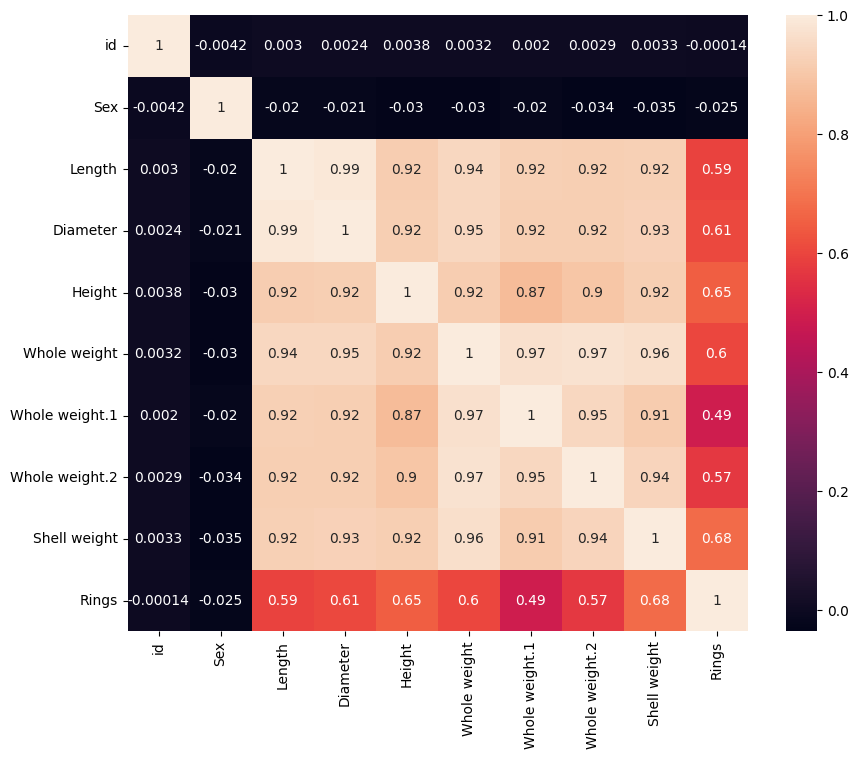

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Features and Target Variable

In [29]:
y = df_train.Rings

features = ['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

X = df_train[features]
X.head()


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
5,0,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085


In [30]:
from sklearn.model_selection import train_test_split
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(train_X)
X_test_scaled = sc.transform(val_X)

In [31]:
X_train_scaled

array([[-0.06081114, -0.96910126, -0.87453149, ..., -0.84238315,
        -1.03363349, -0.98742127],
       [-0.06081114, -1.01535952, -0.9855827 , ..., -0.99950646,
        -1.0177099 , -1.02898867],
       [ 1.19313596,  0.64993785,  0.79123656, ...,  0.56373732,
         0.01732339,  0.34689219],
       ...,
       [ 1.19313596, -0.04393605, -0.04164747, ..., -0.50683167,
        -0.10475746,  0.25960065],
       [ 1.19313596,  1.25129524,  1.17991577, ...,  1.69023157,
         1.79014963,  1.58975737],
       [-1.31475823,  1.11252045,  1.29096697, ...,  0.97119269,
         1.02581736,  1.88072916]])

In [32]:
X_test_scaled

array([[-0.06081114,  0.27987177,  0.34703174, ..., -0.16329088,
        -0.22153045,  0.01435301],
       [ 1.19313596, -0.22896909, -0.20822427, ..., -0.75716373,
        -0.31176412, -0.32234291],
       [-0.06081114, -2.49562385, -2.48477395, ..., -1.64131524,
        -1.63342201, -1.69406703],
       ...,
       [-0.06081114, -2.54188211, -2.48477395, ..., -1.66794631,
        -1.65465346, -1.68159681],
       [-0.06081114,  0.27987177,  0.18045494, ...,  0.057747  ,
         0.15532782, -0.03137113],
       [-1.31475823,  0.37238829,  0.40255735, ..., -0.02480931,
         0.26148508,  0.09333106]])

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import lightgbm
import catboost
import joblib

In [34]:
#Define a list of models to train and compare
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ("XGB" , XGBRegressor()),
    ("CAT" , catboost.CatBoostRegressor(verbose=0)),
    ("LGBM" , lightgbm.LGBMRegressor(verbose=0))
]

# Train and evaluate each model
for name, model in models:
    model.fit(train_X, train_y)
    y_pred = model.predict(val_X)
    mse = mean_squared_error(val_y, y_pred)
    r2 = r2_score(val_y, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')

Linear Regression: MSE = 3.94, R2 = 0.58
Ridge Regression: MSE = 3.94, R2 = 0.58
Lasso Regression: MSE = 9.33, R2 = -0.00
Decision Tree: MSE = 6.88, R2 = 0.26
Random Forest: MSE = 3.56, R2 = 0.62
XGB: MSE = 3.49, R2 = 0.63
CAT: MSE = 3.37, R2 = 0.64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
LGBM: MSE = 3.44, R2 = 0.63


In [ ]:
# The MSE represents the average squared difference between the predicted and actual values, and a lower MSE indicates better performance.
# The R2 score represents the proportion of variance in the target variable that is predictable from the independent variables, and a higher R2 score indicates better performance.

In [35]:
cbr = CatBoostRegressor()
cbr.fit(train_X, train_y)
y_pred = cbr.predict(val_X)
print(mean_squared_error(val_y, y_pred))
print(r2_score(val_y,y_pred))

from sklearn.metrics import mean_absolute_error
rf_val_mae = mean_absolute_error(y_pred, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Learning rate set to 0.079267
0:	learn: 2.9671733	total: 11.5ms	remaining: 11.5s
1:	learn: 2.8600750	total: 21.3ms	remaining: 10.6s
2:	learn: 2.7652655	total: 31ms	remaining: 10.3s
3:	learn: 2.6794659	total: 40.3ms	remaining: 10s
4:	learn: 2.6039944	total: 49.6ms	remaining: 9.86s
5:	learn: 2.5359174	total: 58.7ms	remaining: 9.73s
6:	learn: 2.4768091	total: 67.7ms	remaining: 9.61s
7:	learn: 2.4206269	total: 77.1ms	remaining: 9.56s
8:	learn: 2.3716355	total: 86.1ms	remaining: 9.48s
9:	learn: 2.3288723	total: 95.4ms	remaining: 9.45s
10:	learn: 2.2921272	total: 105ms	remaining: 9.41s
11:	learn: 2.2613723	total: 115ms	remaining: 9.43s
12:	learn: 2.2291030	total: 124ms	remaining: 9.44s
13:	learn: 2.2017237	total: 134ms	remaining: 9.43s
14:	learn: 2.1763450	total: 143ms	remaining: 9.41s
15:	learn: 2.1551895	total: 153ms	remaining: 9.38s
16:	learn: 2.1344595	total: 162ms	remaining: 9.39s
17:	learn: 2.1169118	total: 172ms	remaining: 9.38s
18:	learn: 2.1017242	total: 181ms	remaining: 9.35s
19:	l

In [36]:
# print the top few validation predictions

print(cbr.predict(val_X.head()))
# print the top few actual ages from validation data
print(val_y.head())


[ 9.47895338 11.06682439  4.99998983  6.11171754  8.91052642]
53277     9
80903    13
85830     4
78834     5
50454    11
Name: Rings, dtype: int64


In [37]:
val_mae = cbr.predict(val_X)

print( mean_absolute_error(val_y, y_pred))


1.2354002272256424


### Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'depth': [6, 8, 10],            # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'l2_leaf_reg': [1, 3, 5]        # Regularization coefficient
}

In [40]:
model = CatBoostRegressor(early_stopping_rounds=50, thread_count=-1, logging_level='Silent')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)


In [41]:
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7a87358a3a00>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='neg_mean_squared_error')

In [42]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.2}


In [43]:
# print the top few validation predictions

print(best_model.predict(val_X.head()))
# print the top few actual ages from validation data
print(val_y.head())

[ 9.25517931 11.0005264   4.90721397  6.0702443   9.14906829]
53277     9
80903    13
85830     4
78834     5
50454    11
Name: Rings, dtype: int64


In [44]:
val_mae = best_model.predict(val_X)



print( mean_absolute_error(val_y, y_pred))

1.2354002272256424


In [45]:
test_X = df_test[features]
test_preds = best_model.predict(test_X)


output = pd.DataFrame({'id': df_test.id,
                       'Rings': test_preds})
output.to_csv('submission5.csv', index=False)